In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Functions

In [2]:
class NaiveBayes:
    def __init__(self) -> None:
        self.classes = []
        self.priors = []
        self.means = []
        self.vars = []
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = np.array([np.mean(y == c) for c in self.classes])
        self.means = np.array([np.mean(X[y == c], axis=0) for c in self.classes])
        self.vars = np.array([np.var(X[y == c], axis=0) for c in self.classes])
    
    def predict(self, X):
        return np.array([self._predict(x) for x in X])
    
    def _predict(self, x):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = np.log(self.priors[i])
            posterior = np.sum(np.log(self._pdf(i, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]
    
    def _pdf(self, class_idx, x):
        mean = self.means[class_idx]
        var = self.vars[class_idx]
        coeff = 1 / np.sqrt(2 * np.pi * var )
        exponent = np.exp(-(x - mean)**2 / (2 * var))
        return coeff * exponent
    
    def score(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

In [3]:
data = pd.read_csv('../data/cancer.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# Train

In [4]:
data.columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


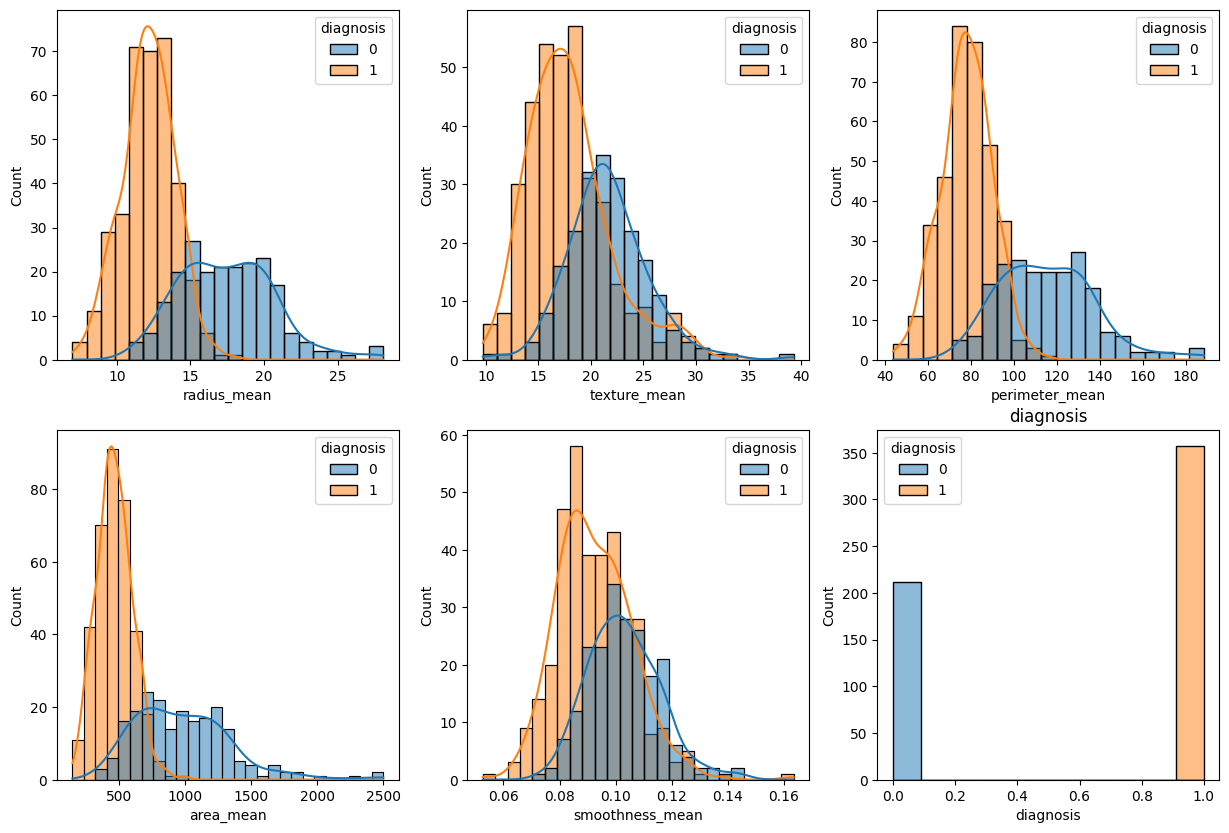

In [5]:
# Hist sub plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    sns.histplot(data=data, x=data.columns[i], hue='diagnosis', kde=True, ax=ax)
    plt.title(data.columns[i])
plt.show()

In [6]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = NaiveBayes()
model.fit(X_train.values, y_train.values)

# Test

In [8]:
y_pred = model.predict(X_test.values)
model.score(y_pred, y_test)

0.9473684210526315